In [3]:

#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
#Import Data and Assign variable names
wdbc = pd.read_csv(r'\wdbc.csv', 
                   names = ['id', 'diagnosis',
                   'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
                   'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                   'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
                   'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',                   
                   'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
                   'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'])


In [22]:
wdbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#Standardize the data, run PCA
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
                   'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                   'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
                   'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',                   
                   'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
                   'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [5]:
# Separating out the features
x = wdbc.loc[:, features].values
# Separating out the target
y = wdbc.loc[:,['diagnosis']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
wdbc_PCA = PCA(n_components=30, svd_solver='full')
principalComponents = wdbc_PCA.fit_transform(x)

Use cumulative proportion (% that covers all the variance) or eigenvalues ( 1?)

In [7]:

print(np.sqrt(wdbc_PCA.explained_variance_))
print (wdbc_PCA.explained_variance_ratio_)
print (wdbc_PCA.explained_variance_ratio_.cumsum())

[3.64760069 2.38775514 1.68015182 1.40859061 1.28515884 1.09976463
 0.82244081 0.69098209 0.64624205 0.59271483 0.54261695 0.51148916
 0.49171376 0.39659318 0.30708418 0.28284873 0.24393363 0.22958968
 0.22263131 0.17667558 0.17327915 0.16579418 0.15615278 0.13448715
 0.12453324 0.09050987 0.08314212 0.03990158 0.02738834 0.01154465]
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9

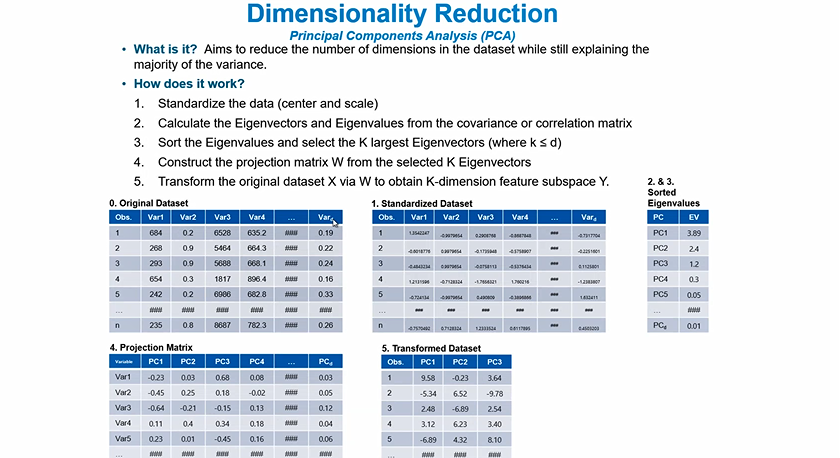

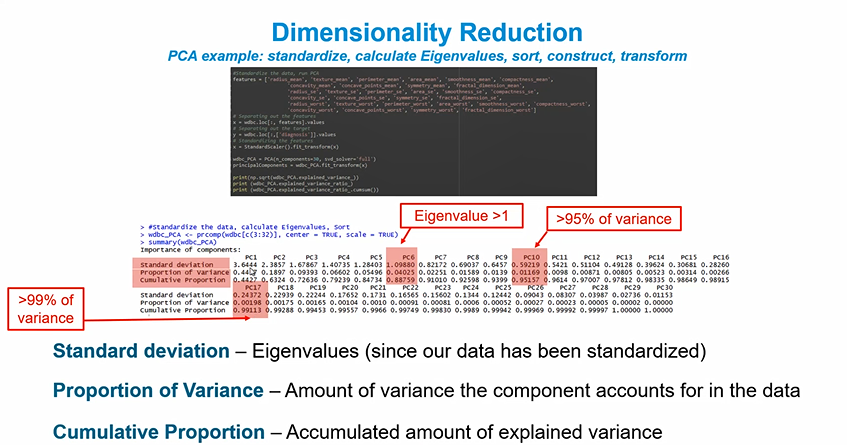

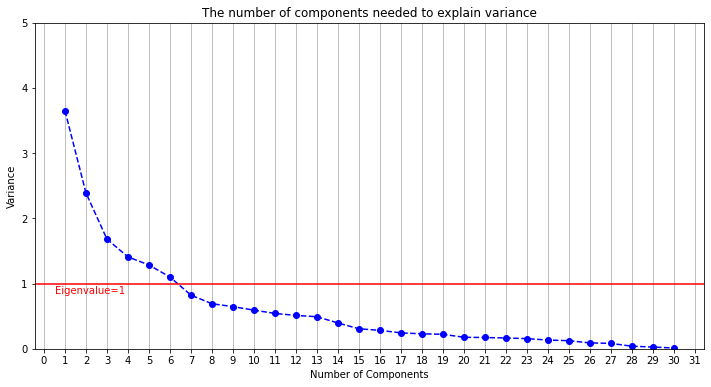

In [8]:
#Screeplot of PCAs
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
y = np.sqrt(wdbc_PCA.explained_variance_)

plt.ylim(0.0,5)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 32, step=1)) 
plt.ylabel('Variance')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, 'Eigenvalue=1', color = 'red', fontsize=10)

ax.grid(axis='x')
plt.show()

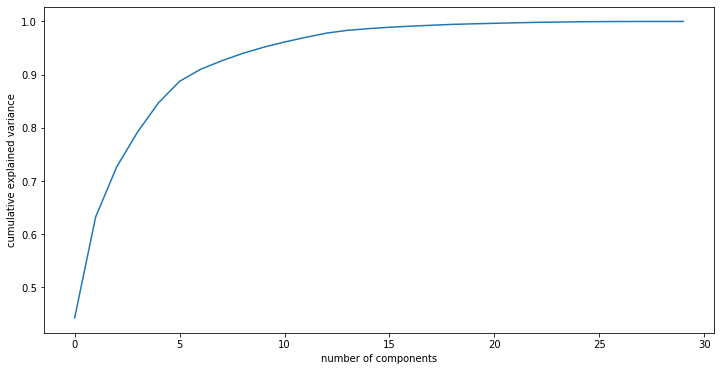

In [9]:
##Cummulative Variance Explained
plt.plot(np.cumsum(wdbc_PCA.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
#Look at projection matrix 
ProjMatrixLoads = pd.DataFrame(wdbc_PCA.components_.T, 
             columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 
                        'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                        'PC13', 'PC14', 'PC14', 'PC16', 'PC17', 'PC18',
                        'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24',
                        'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30'],
                        index = features)

In [11]:
#Add the PCA scores to dataset to use in modeling and view
wdbc_PCA_Scores = pd.DataFrame(data=principalComponents,
                       columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 
                        'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                        'PC13', 'PC14', 'PC14', 'PC16', 'PC17', 'PC18',
                        'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24',
                        'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30'])

wdbc_PCA_ALL = pd.concat([wdbc_PCA_Scores, wdbc[['diagnosis']]], axis=1)


In [21]:
wdbc_PCA_ALL

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415,1
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419,1
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770,1
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783,1


In [18]:
ProjMatrixLoads

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
radius_mean,0.218902,-0.233857,-0.008531,0.041409,0.037786,0.018741,-0.124088,-0.007452,-0.223110,0.095486,...,-0.068570,0.072929,-0.098553,0.182579,0.019226,-0.129476,-0.131527,0.211194,0.211460,-0.702414
texture_mean,0.103725,-0.059706,0.064550,-0.603050,-0.049469,-0.032179,0.011400,0.130675,0.112699,0.240934,...,0.448369,0.094801,-0.000555,-0.098787,-0.084746,-0.024557,-0.017357,-0.000066,-0.010534,-0.000274
perimeter_mean,0.227537,-0.215181,-0.009314,0.041983,0.037375,0.017308,-0.114477,-0.018687,-0.223739,0.086386,...,-0.069769,0.075160,-0.040245,0.116649,-0.027015,-0.125256,-0.115415,0.084338,0.383826,0.689897
area_mean,0.220995,-0.231077,0.028700,0.053434,0.010331,-0.001888,-0.051653,0.034674,-0.195586,0.074956,...,-0.018443,0.097566,0.007777,-0.069848,0.210041,0.362727,0.466612,-0.272508,-0.422795,0.032947
smoothness_mean,0.142590,0.186113,-0.104292,0.159383,-0.365089,-0.286374,-0.140669,-0.288975,0.006425,-0.069293,...,-0.119492,0.063823,-0.020666,-0.068697,-0.028955,-0.037004,0.069690,0.001479,-0.003435,0.004847
compactness_mean,0.239285,0.151892,-0.074092,0.031795,0.011704,-0.014131,0.030918,-0.151396,-0.167841,0.012936,...,0.192621,-0.098078,0.052360,0.104136,-0.396623,0.262808,0.097749,-0.005463,-0.041017,-0.044674
concavity_mean,0.258400,0.060165,0.002734,0.019123,0.086375,-0.009344,-0.107520,-0.072827,0.040591,-0.135602,...,0.005572,-0.185212,0.324870,-0.044741,0.096977,-0.548876,0.364808,0.045539,-0.010015,-0.025139
concave_points_mean,0.260854,-0.034768,-0.025564,0.065336,-0.043861,-0.052050,-0.150482,-0.152322,-0.111971,0.008055,...,-0.009424,-0.311852,-0.051409,-0.084028,0.186452,0.387643,-0.454699,-0.008883,-0.004207,0.001077
symmetry_mean,0.138167,0.190349,-0.040240,0.067125,-0.305941,0.356458,-0.093891,-0.231531,0.256040,0.572069,...,-0.086938,-0.018407,-0.051201,-0.019339,0.024584,-0.016044,-0.015165,0.001433,-0.007570,0.001280
fractal_dimension_mean,0.064363,0.366575,-0.022574,0.048587,-0.044424,-0.119431,0.295760,-0.177121,-0.123741,0.081103,...,-0.076272,0.287869,-0.084690,0.133261,0.207222,-0.097405,-0.101245,-0.006312,0.007301,0.004756


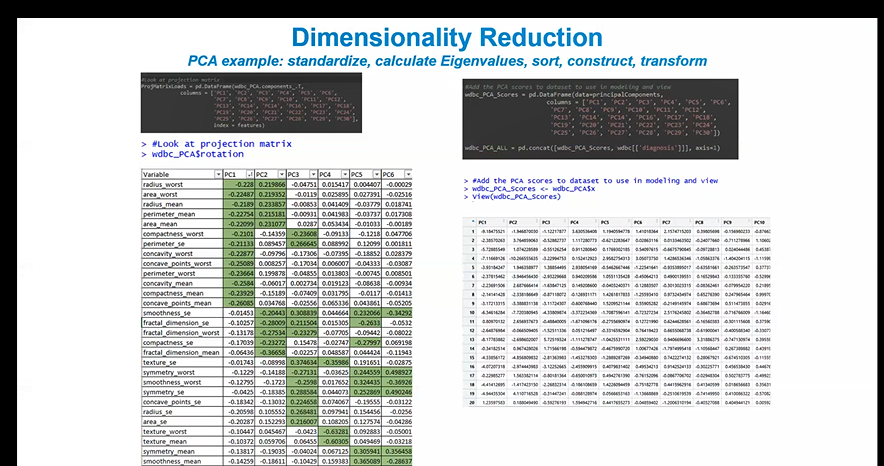

In [12]:
#Predictwith 6 PCs (logistic Regression)

#Logistic modeling using only Principle Components
wdbc_PCA_ALL.replace(to_replace={'diagnosis' : {'M': 1, 'B': 0}}, inplace = True)

logisticmodel = smf.logit(formula = 'diagnosis ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6', data = wdbc_PCA_ALL).fit()
logisticmodel.summary()

Optimization terminated successfully.
         Current function value: 0.069963
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      562
Method:                           MLE   Df Model:                            6
Date:                Mon, 07 Jun 2021   Pseudo R-squ.:                  0.8940
Time:                        12:42:14   Log-Likelihood:                -39.809
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                7.409e-142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4619      0.310     -1.490      0.136      -1.070       0.146
PC1            3.0864      0.484      6.374      0.000       2.137       4.035
PC2           -1.7454      0.326     -5.357      0.000      -2.384      -1.107
PC3           -0.6236      0.204     -3.061      0.002      -1.023      -0.224
PC4           -0.7748      0.217     -3.565      0.000      -1.201      -0.349
PC5           -1.4612      0.420     -3.476      0.001      -2.285      -0.637
PC6           -0.4862      0.249     -1.954      0.051      -0.974       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [13]:
#Logisitc Model with all variables
wdbc_reduc = wdbc.drop(['id'] , axis=1)
wdbc_reduc.replace(to_replace={'diagnosis' : {'M': 1, 'B': 0}}, inplace = True)
all_columns = '+'.join(features)
f = 'diagnosis ~ ' + all_columns
logisticmodel = smf.logit(formula = str(f), data = wdbc_reduc)
results = logisticmodel.fit(method = 'bfgs')
results.summary()

         Current function value: 0.086366
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


C:\Users\avhw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\avhw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\avhw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\avhw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\avhw\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      538
Method:                           MLE   Df Model:                           30
Date:                Mon, 07 Jun 2021   Pseudo R-squ.:                  0.8692
Time:                        12:42:30   Log-Likelihood:                -49.143
converged:                      False   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.777e-118
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.7822     19.170     -0.041      0.967     -38.356      36.791
radius_mean                -3.4536      8.333     -0.414      0.679     -19.787      12.880
texture_mean               -0.1003      0.227     -0.442      0.659      -0.546       0.345
perimeter_mean              0.4544      1.066      0.426      0.670      -1.635       2.543
area_mean                  -0.0131      0.035     -0.377      0.706      -0.081       0.055
smoothness_mean             0.1647     69.674      0.002      0.998    -136.393     136.722
compactness_mean            0.6422     50.294      0.013      0.990     -97.932      99.217
concavity_mean              0.9521     33.411      0.028      0.977     -64.532      66.437
concave_points_mean         0.4439     64.837      0.007      0.995    -126.635     127.523
symmetry_mean               0.2247     23.510      0.010      0.992     -45.854      46.303
fractal_dimension_mean      0.0289    197.700      0.000      1.000    -387.456     387.514
radius_se                   0.0229     21.225      0.001      0.999     -41.578      41.624
texture_se                 -1.7379      1.575     -1.103      0.270      -4.825       1.349
perimeter_se               -0.2989      1.501     -0.199      0.842      -3.240       2.642
area_se                     0.1326      0.211      0.628      0.530      -0.282       0.547
smoothness_se               0.0160    233.330   6.88e-05      1.000    -457.302     457.334
compactness_se              0.0872     79.868      0.001      0.999    -156.452     156.626
concavity_se                0.1531     42.971      0.004      0.997     -84.069      84.375
concave_points_se           0.0537    264.665      0.000      1.000    -518.681     518.788
symmetry_se                 0.0469     85.171      0.001      1.000    -166.886     166.980
fractal_dimension_se        0.0059    352.904   1.68e-05      1.000    -691.674     691.686
radius_worst               -2.4925      2.723     -0.915      0.360      -7.829       2.844
texture_worst               0.4123      0.219      1.880      0.060      -0.017       0.842
perimeter_worst             0.0974      0.233      0.418      0.676      -0.359       0.554
area_worst                  0.0413      0.028      1.499      0.134      -0.013       0.095
smoothness_worst            0.2963     43.974      0.007      0.995     -85.892      86.484
compactness_worst           1.8572     12.273      0.151      0.880     -22.197      25.911
concavity_worst             2.4611      8.996      0.274      0.784     -15.171      20.093
concave_points_worst        0.8269     30.722      0.027      0.979     -59.387      61.041
symmetry_worst              0.7000     13.379      0.052      0.958     -25.522      26.922
fractal_dimension_worst     0.1754     72.544      0.002      0.998    -142.008     142.359
===========================================================================================

Possibly complete qu